# 01 -mpg데이터 실습
R패키지에 포함되어 있는 예제 데이터로 1998년, 2004년, 2008년도에 미국에서 생산되는 자동차 제조회사별로
자동차의연비, 구동방식 등을 조사한 데이터.

## #01. 패키지 및 샘플 데이터 준ㄴ비

### 1) 패키지 가져오기

In [70]:
from pandas import DataFrame
from pandas import ExcelFile
from pandas import merge
from matplotlib import pyplot
import numpy

### 2) 예제 데이터 가져오기

In [23]:
xlsx = ExcelFile("http://itpaper.co.kr/demo/py/mpg.xlsx")
mpg_df = xlsx.parse(xlsx.sheet_names[0])
mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [24]:
## #02. 기술통계

### 1) 데이터 내용 확인하기

#### mpg 데이터의 크기 확인

In [25]:
행,열 = mpg_df.shape
print("행의 크기 = ",행)
print("열의 크기 = ",열)

행의 크기 =  234
열의 크기 =  12


데이터의 일부 확인하기

상위 5건확인하기
하위 5건확인하기

In [26]:
mpg_df.head(5)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [27]:
mpg_df.tail(5)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,234,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


##2) 데이터 요약 정보를 통해 기술통계값 확인하기

In [28]:
mpg_df.describe()

,Unnamed: 0,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,3.471795,2003.500000,5.888889,16.858974,23.440171
std,67.694165,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.000000,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,59.250000,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,117.500000,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,175.750000,4.600000,2008.000000,8.000000,19.000000,27.000000
max,234.000000,7.000000,2008.000000,8.000000,35.000000,44.000000


양적자료

요약정보에 집계가 되는 컬럼으로서 관측된 값이 수치 형태의 속성을가지는 자료.

사분위수와 상자그림으로 데이터 분포ㅡ르 확인해야 하는 값들이다.

범위형 자료 interval : 화씨, 섭씨와 같이 수치간에 차이가 의미를 가지는 자료.
비율 자료 ratio : 자료 : 무게와 같이 수치의 차이 뿐만 아니라 비율 또한 의미를 가지는 자료 

베기량, 생산년도, 실린더 개수, 도시연비, 고속도로연비

(이 중에서 생산년도와 실린더 개수는 데이터 값으 종류가 매우 적으므로 반드시 확인할 필요는 없다.)

질적자료 

범주 또는 순서 ㄷ형태의 속성을 가지는 자료로서

### 3) 양적 자료의 데이터 분포 확인

#### 상자그림을 통한 데이터 분포 확인하기

##### 그래프 기본 설정

In [29]:
pyplot.rcParams["font.family"] ='AppleGothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20, 10)

##### 상자그림 확인

배기량, 생산년도, 실린더 개수, 도시연비, 고속도로 연비

>이 데이터 셋에서 생산 년도는 반드시 확인해야할 항목은 아니므로 생략함

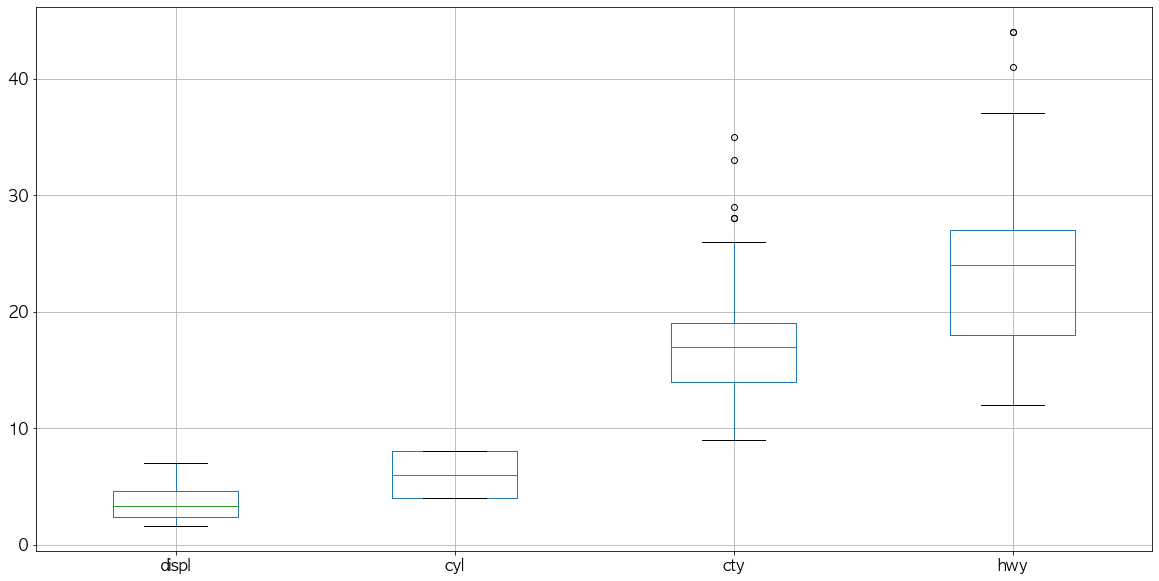

In [30]:
mpg_df.boxplot(['displ' , 'cyl', 'cty', 'hwy'])
pyplot.show()

### 질적 자료에 대한 데이터 빈도 확인
제조회사, 모델명, 변속기 종류, 구동방식, 연료 종류, 자동차 종류

#### 데이터 빈도수 확인하기

In [31]:
mpg_df['manufacturer'].value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
mercury        4
land rover     4
lincoln        3
Name: manufacturer, dtype: int64

In [32]:
mpg_df['model'].value_counts()

caravan 2wd               11
ram 1500 pickup 4wd       10
civic                      9
mustang                    9
dakota pickup 4wd          9
jetta                      9
a4 quattro                 8
grand cherokee 4wd         8
impreza awd                8
durango 4wd                7
passat                     7
sonata                     7
camry                      7
a4                         7
camry solara               7
toyota tacoma 4wd          7
f150 pickup 4wd            7
tiburon                    7
4runner 4wd                6
explorer 4wd               6
altima                     6
new beetle                 6
forester awd               6
malibu                     5
corolla                    5
grand prix                 5
c1500 suburban 2wd         5
gti                        5
corvette                   5
range rover                4
pathfinder 4wd             4
mountaineer 4wd            4
k1500 tahoe 4wd            4
a6 quattro                 3
maxima        

In [33]:
mpg_df['trans'].value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [34]:
mpg_df['drv'].value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [35]:
mpg_df['fl'].value_counts()

r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64

In [36]:
mpg_df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

### 5) 문제

#### q1)  자동차 배기량에 다라 고속도로 연비가 다른지 알아보려고 한다. displ(배기량)이 4이하인 자동차와 5이상인 자동차중 어떤 자동차의 hwy(고속도로 연비)가 평균적으로 더 높은지 알아보시오.

In [37]:
mpg_a = mpg_df.query('displ <4')
mpg_a['hwy'].mean()

26.60810810810811

In [38]:
mpg_b = mpg_df.query('displ > 5')
mpg_b['hwy'].mean()

18.13888888888889

### 5) 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고한다. "audi"와 ""중 어느 manufacturer(자동차제조회사)의 cty(도시연비)가 평균적으로 더 높은지 알아보자

#### "audi"의 도시연비 평균

In [41]:
mpg_c = mpg_df.query('manufacturer == "audi"')
mpg_c['cty'].mean()

17.61111111111111

"toyota"의 도시연비 평균

In [42]:
mpg_d = mpg_df.query('manufacturer == "toyota"')
mpg_d['cty'].mean()

18.529411764705884

### q3 ) "chevrolet" ,"ford", "honda" 자동차의 고속도로 연비 평균을 알아보려고 한다. 이회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오

#### 방법 1 = in 연산사용하기

In [53]:
target = ['chevrolet', 'ford', 'honda']
target_df = mpg_df.query('manufacturer in @target')
target_df['hwy'].mean()

22.50943396226415

방법 2 = or 연산 사용하기

In [49]:
target_df = mpg_df.query('manufacturer == "chevrolet" or manufacturer =="ford" or manufacturer =="honda"')
target_df['hwy'].mean()

22.50943396226415

## #02.데이터 전처리 문제

mpg데이터의 fl변수는 자동차에 사용하는 연로(fuel)를 의미한다. (각 연료 이름의 첫 글자만 저장.)
mpg데이터에는 연료 종류를 나타낸 fl 변수는 있지만 연료 가격을 나타낸 변수는 없다.
다음의 가격정보를 이용해 mpg데이터에 price_fl(연료가격)변수를 추가하라

코드 종류 가격

c 가스 2.35달러
d 디젤 2.38달러
e 
p
r

추가하 결과에서 model, fl, price_fl 추철하여 출력하세요

### 1) mpg에 연료 가격 변수 추가
#### 연료 가격 정보 만들기

In [56]:
연료가격df = DataFrame({
    "fl" : ["c", "d", "e", "p","r"],
    "price_fl" : [2.35, 2.38, 2.11, 2.76, 2.22]
})
연료가격df

,fl,price_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,2.76
4,r,2.22


In [58]:
병합df =merge(mpg_df, 연료가격df, left_on='fl', right_on='fl')
병합df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,123,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22,d,suv,2.38
230,213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,2.38
231,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,2.38
232,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,2.38


In [59]:
병합df.filter(['model','fl','price_fl'])

,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76
...,...,...,...
229,grand cherokee 4wd,d,2.38
230,jetta,d,2.38
231,new beetle,d,2.38
232,new beetle,d,2.38


 ## # 04. 데이터 정제 문제
 
 ### 1) 결측치 정제
 
 #### mpg데이터에서 구동방식 (drv)별 고속도로 염비(hwy) 평균 알아보기
 
 > 문제 설정을 위해 아래와 같이 임의의 결측치를 생성하고 진행


In [60]:
mpg_df.loc[65, "hwy"] = None
mpg_df.loc[124, "hwy"] = None
mpg_df.loc[131, "hwy"] = None
mpg_df.loc[153, "hwy"] = None
mpg_df.loc[212, "hwy"] = None

#### q1 분석을 하기 전에 두 변수에 결측치가 있는지 확인해야 한다. 구동방식 변수와고속도로 연비 변수에 결측치가 몇 개 있는지 알아보아라.

##### 구동방식에 대한 결측치 확인

In [61]:
결측치합계 = mpg_df.filter(['drv','hwy']).isna().sum()
결측치합계

drv    0
hwy    5
dtype: int64

#### q2 )hwy 변수의 결측치를 제외하고 , 어떤 구동 방식의 hwy의 평균이 높은지 알아보아라

##### 구동방식과 고속도로 연비 추출 후 결측치 제거

In [63]:
정제df =mpg_df.filter(['drv','hwy']).dropna()
정제df

,drv,hwy
0,f,29.0
1,f,29.0
2,f,31.0
3,f,30.0
4,f,26.0
...,...,...
229,f,28.0
230,f,29.0
231,f,26.0
232,f,26.0


##### 구동방식별 평균

In [65]:
정제df.groupby('drv').mean()

,hwy
drv,
4,19.262626
f,28.009524
r,21.000000


### 3) 이상치 정제

#### mpg 데이터에서 구동방식별 고속도로 연비 평균과 도시 연비 평규능ㄹ 극단치를 제외하고 확인하시오.

#### 각 연비별 이상치 확인

상자그림과 함께 상자 그리의 상태값을 함께 출력하여 극단치 경계값을 찾아야한다.

> 상자그림의 출력 결과 고속도로 연부의 경우 37보다 큰 경우, 도시연비의 경우 26보다 큰 경우가 이상치인것으로 확인된다.

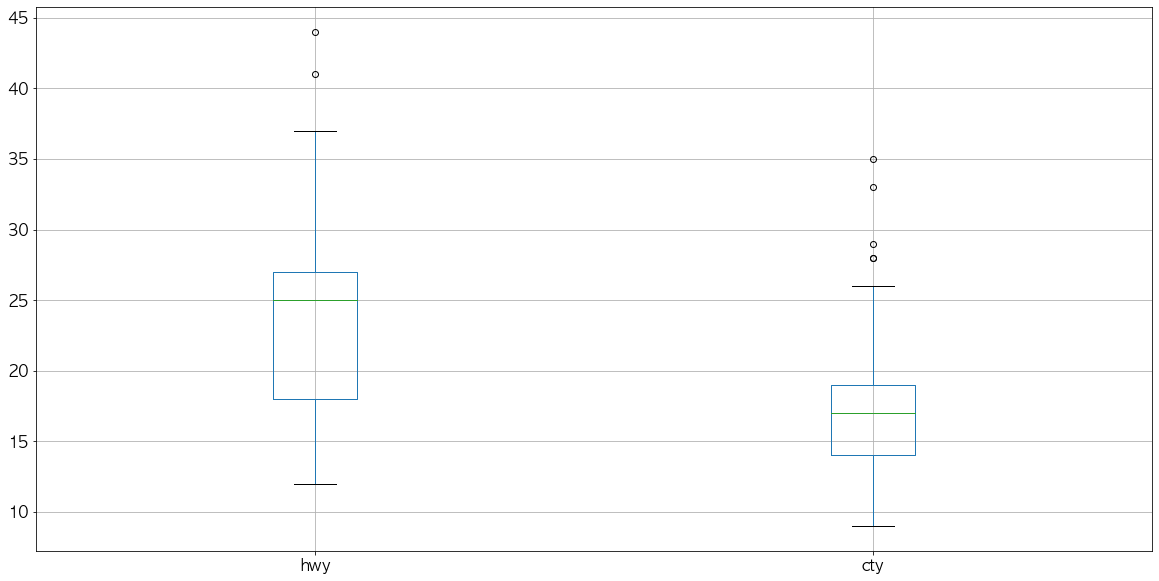

In [67]:
mydf= mpg_df.filter(['drv','hwy','cty'])
mydf.boxplot()
pyplot.show()

#### 이상치를 결측치로 변경하기

##### a) 고속도로 연비의 이상치 데이터 추추라기

In [68]:
이상치df1 = mpg_df.query('hwy > 37')
이상치df1

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
221,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44.0,d,subcompact
222,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41.0,d,subcompact


##### b) 도시연비의 이상치 데이터 추출하기

In [69]:
이상치df2 = mpg_df.query('cty>26')
이상치df2

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,100,honda,civic,1.6,1999,4,manual(m5),f,28,33.0,r,subcompact
196,197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37.0,r,compact
212,213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact
221,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44.0,d,subcompact
222,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41.0,d,subcompact


#### c) 정제를 위한 복사본 생성

In [73]:
이상치정제df = mpg_df.copy()
이상치정제df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [74]:
##### d) 고속도로 연비에 대한 이상치를 결측치로 변경

In [76]:
for i in 이상치df1.index:
    이상치정제df.loc[i, 'hwy'] = numpy.nan

이상치정제df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [77]:
for i in 이상치df2.index:
    이상치정제df.loc[i, 'hwy'] = numpy.nan

이상치정제df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [78]:
##### f) 결측치 확인

In [79]:
이상치정제df.filter(['drv','hwy']).isna().sum()
이상치정제df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [80]:
#### 결측치를 제거한 구동방식별 고속도로 연비 평균과 도시 연비 평균

In [81]:
구동방식별연비평균df = 이상치정제df.filter(['drv','hwy','cty']).dropna().groupby('drv').mean()
구동방식별연비평균df

,hwy,cty
drv,,
4,19.262626,14.424242
f,27.584158,19.445545
r,21.000000,14.080000


In [82]:
### 4)데이터 시각화

#### q1) 앞에서 도출한 구동방식별 연비평균을 비교하기 위한 막대 그래프를 생성하시오.

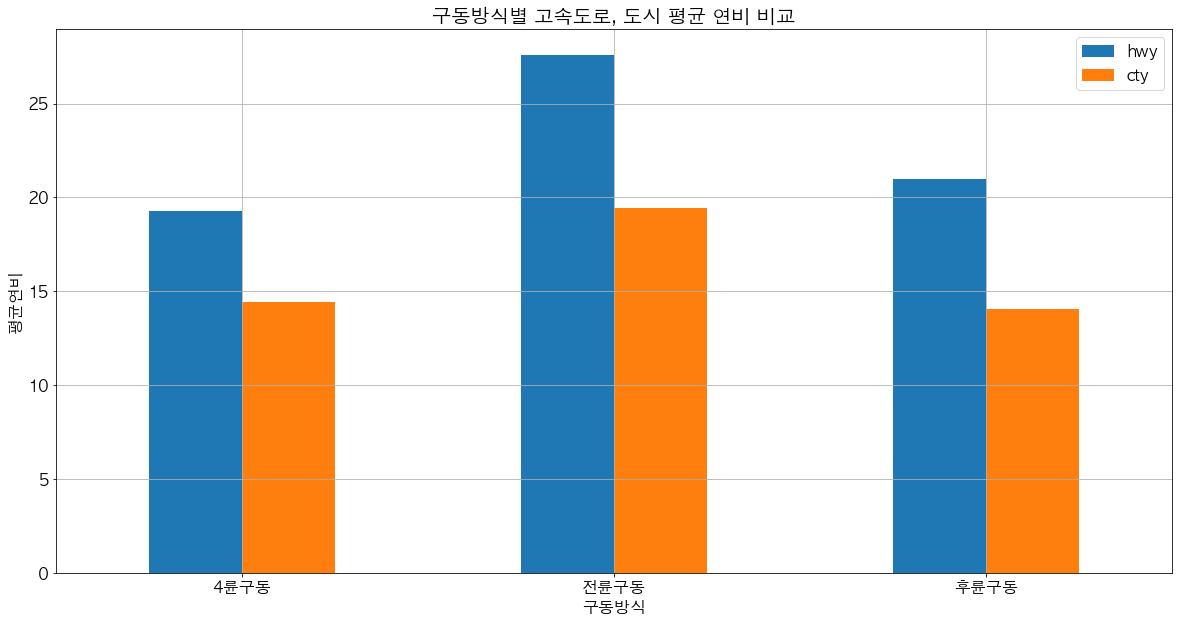

In [83]:
구동방식별연비평균df.plot.bar(rot=0)
pyplot.grid()
pyplot.xticks([0,1,2],['4륜구동','전륜구동','후륜구동'])
pyplot.title('구동방식별 고속도로, 도시 평균 연비 비교')
pyplot.ylabel('평균연비')
pyplot.xlabel('구동방식')
pyplot.show()


In [85]:
#### q2) 자동차주에서 어떤 class(자동차 종류)가 가장 많은지 알아보려고 한다. 자동차 종류별 빈도를 표현한 막대 그래프를 표현하시오
##### 값의 종류별 빈도수 검사


In [89]:
vcount = mpg_df['class'].value_counts()
vcount

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

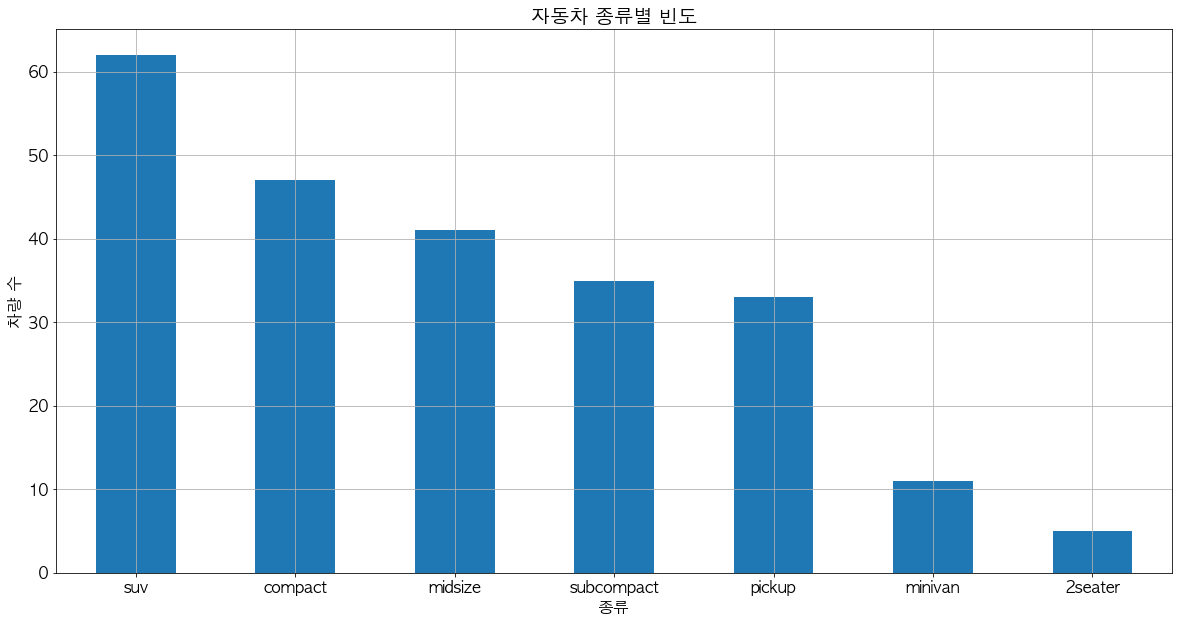

In [90]:
vcount.plot.bar(rot=0)
pyplot.grid()
pyplot.title('자동차 종류별 빈도')
pyplot.ylabel('차량 수')
pyplot.xlabel('종류')
pyplot.show()

In [91]:
어떤 회사에서 생산한 suv 차종의 도시연비cty가 높은지 알아보려 한다. suv 차종을 대상으로 평균 도시연비가 가장 높은 회사 다섯곳을 막대 그래프로 표현하시오.
SUV차종에 대한 제조사별 도시연비 구하기

> 컬럼이름 'class' 가 python예약어 이므로 역따음표로 감싼 상태로 명시해야합니다.

SyntaxError: invalid syntax (<ipython-input-91-598011d9ac9c>, line 1)

In [93]:
제조사별suv연비평균df = mpg_df.query("`class` == 'suv'").filter(['manufacturer', 'cty']).groupby('manufacturer').mean()
제조사별suv연비평균df

,cty
manufacturer,
chevrolet,12.666667
dodge,11.857143
ford,12.888889
jeep,13.500000
land rover,11.500000
lincoln,11.333333
mercury,13.250000
nissan,13.750000
subaru,18.833333


In [94]:
##### cty 컬럼을 기준으로 역순정렬

In [95]:
제조사별suv연비정렬df = 제조사별suv연비평균df.sort_values('cty', ascending=False)
제조사별suv연비정렬df

,cty
manufacturer,
subaru,18.833333
toyota,14.375000
nissan,13.750000
jeep,13.500000
mercury,13.250000
ford,12.888889
chevrolet,12.666667
dodge,11.857143
land rover,11.500000


In [96]:
#### 정렬결과에 대한 상위 5건 추출

In [97]:
연비top5df = 제조사별suv연비정렬df.head(5)
연비top5df

,cty
manufacturer,
subaru,18.833333
toyota,14.375000
nissan,13.750000
jeep,13.500000
mercury,13.250000


In [98]:
##### 시각화

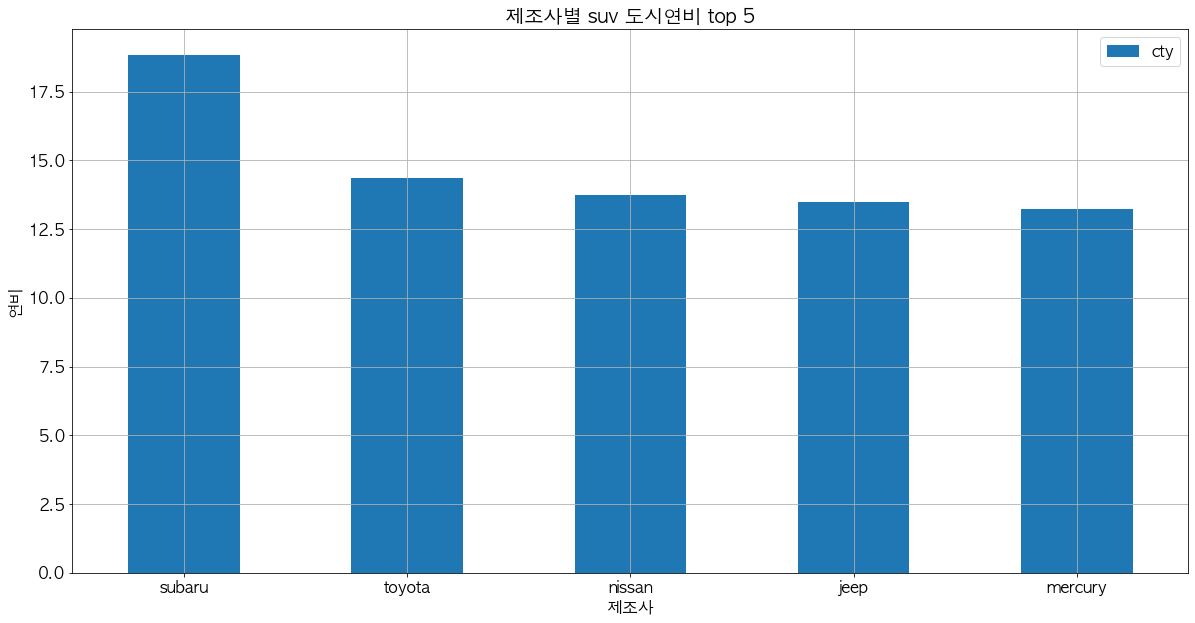

In [103]:
연비top5df.plot.bar(rot=0)
pyplot.grid()
pyplot.title('제조사별 suv 도시연비 top 5')
pyplot.ylabel('연비')
pyplot.xlabel('제조사')
pyplot.show()